In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
train = pd.read_csv('../assets/train.csv')

In [29]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [30]:
train.shape

(10506, 12)

In [31]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [32]:
train.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [33]:
train.describe(include=['object', 'datetime'])

,Date,Address,Species,Street,Trap,AddressNumberAndStreet
count,10506,10506,10506,10506,10506,10506
unique,95,138,7,128,136,138
top,2007-08-01,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL"
freq,551,750,4752,750,750,750


In [35]:
train.Date.unique()

array(['2007-05-29', '2007-06-05', '2007-06-26', '2007-06-29',
       '2007-07-02', '2007-07-11', '2007-07-18', '2007-07-19',
       '2007-07-25', '2007-07-27', '2007-08-01', '2007-08-02',
       '2007-08-03', '2007-08-07', '2007-08-08', '2007-08-09',
       '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-21',
       '2007-08-22', '2007-08-24', '2007-08-28', '2007-09-04',
       '2007-09-05', '2007-09-06', '2007-09-12', '2007-09-18',
       '2007-09-19', '2007-09-24', '2007-09-25', '2007-10-04',
       '2007-10-09', '2009-05-28', '2009-06-02', '2009-06-03',
       '2009-06-05', '2009-06-12', '2009-06-15', '2009-06-19',
       '2009-06-22', '2009-06-26', '2009-06-29', '2009-07-06',
       '2009-07-10', '2009-07-13', '2009-07-17', '2009-07-24',
       '2009-07-27', '2009-07-31', '2009-08-07', '2009-08-13',
       '2009-08-25', '2009-08-27', '2009-09-03', '2009-09-14',
       '2009-09-17', '2009-09-25', '2009-10-01', '2011-06-10',
       '2011-06-17', '2011-06-24', '2011-06-30', '2011-

In [36]:
train.Date = pd.to_datetime(train.Date)

In [37]:
train.dtypes

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [64]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [17]:
train.sort_values('AddressAccuracy').AddressAccuracy.unique()

array([3, 5, 8, 9])

In [40]:
train.sort_values('Trap').Trap.unique()

array(['T001', 'T002', 'T003', 'T004', 'T005', 'T006', 'T007', 'T008',
       'T009', 'T011', 'T012', 'T013', 'T014', 'T015', 'T016', 'T017',
       'T018', 'T019', 'T025', 'T027', 'T028', 'T030', 'T031', 'T033',
       'T034', 'T035', 'T036', 'T037', 'T039', 'T040', 'T043', 'T044',
       'T045', 'T046', 'T047', 'T048', 'T049', 'T050', 'T051', 'T054',
       'T054C', 'T060', 'T061', 'T062', 'T063', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T072', 'T073', 'T074', 'T075', 'T076',
       'T077', 'T078', 'T079', 'T080', 'T081', 'T082', 'T083', 'T084',
       'T085', 'T086', 'T088', 'T089', 'T090', 'T091', 'T092', 'T094',
       'T094B', 'T095', 'T096', 'T097', 'T099', 'T100', 'T102', 'T103',
       'T107', 'T114', 'T115', 'T128', 'T129', 'T135', 'T138', 'T141',
       'T142', 'T143', 'T144', 'T145', 'T146', 'T147', 'T148', 'T149',
       'T150', 'T151', 'T152', 'T153', 'T154', 'T155', 'T156', 'T157',
       'T158', 'T159', 'T160', 'T161', 'T162', 'T200', 'T206', 'T209',
    

In [41]:
# number of traps with WNV present
train[train.WnvPresent == 1].Trap.nunique()

97

In [42]:
train[train.WnvPresent == 1].Species.unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS'], dtype=object)

In [43]:
train.Species.nunique()

7

In [44]:
# number of records with WNV
train[train.WnvPresent == 1].shape

(551, 12)

In [45]:
# proportion of records with WNV
len(train[train.WnvPresent == 1]) / float(len(train))

0.05244622120692937

In [57]:
sns.set_style('whitegrid')
sns.set_context('poster' , font_scale=0.75)

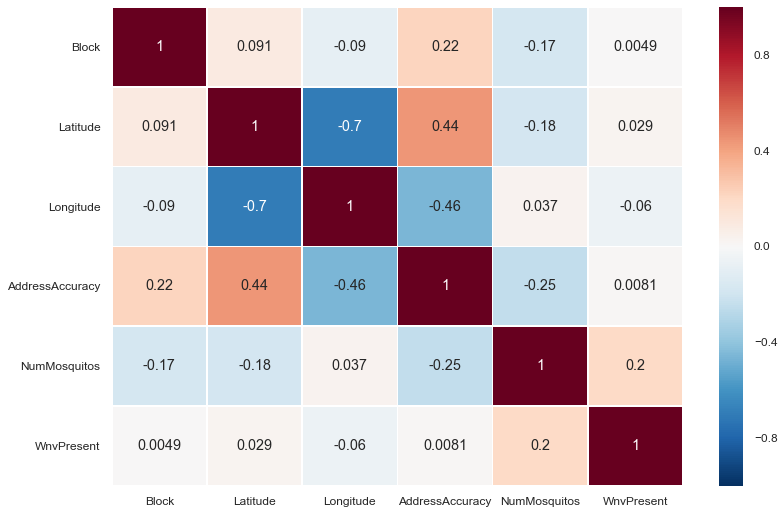

In [58]:
sns.heatmap(train.corr(), linewidths=0.5, annot=True)

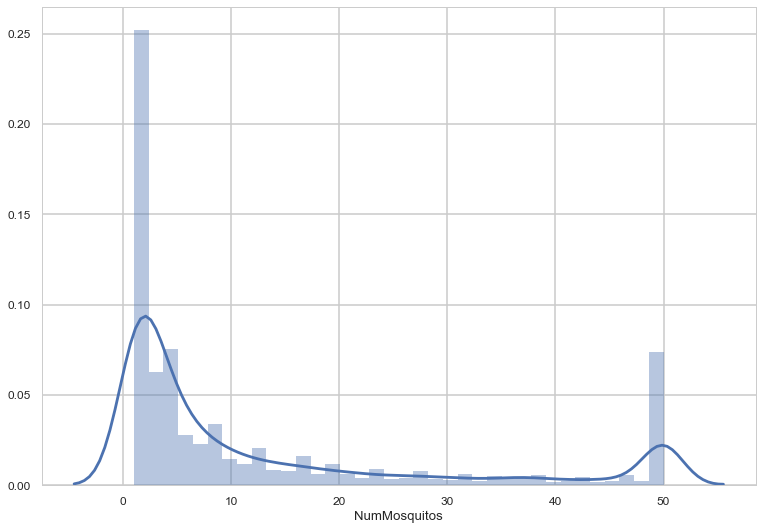

In [61]:
sns.distplot(train.NumMosquitos)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

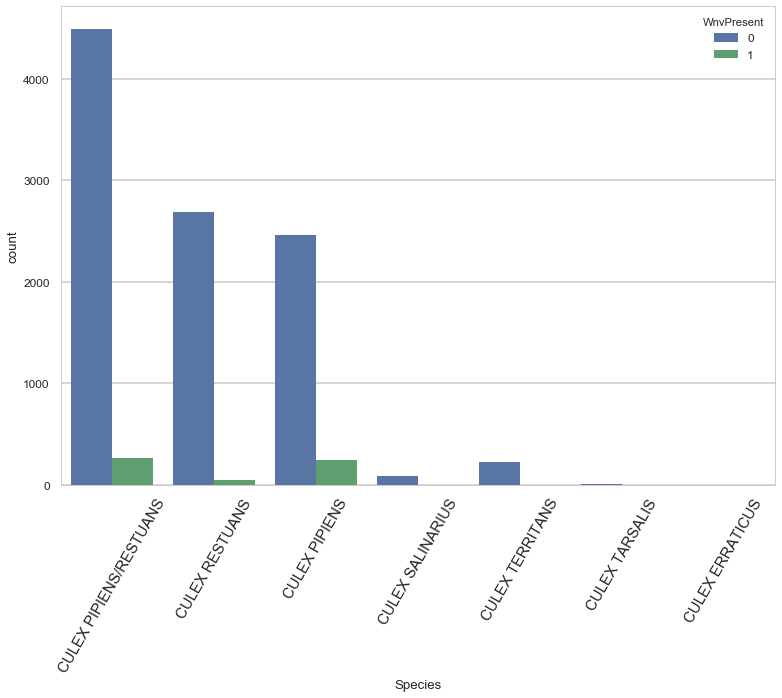

In [63]:
sns.countplot(train.Species, hue=train.WnvPresent)
plt.xticks(rotation = 60, fontsize=15)

In [65]:
train['year'] = train.Date.dt.year

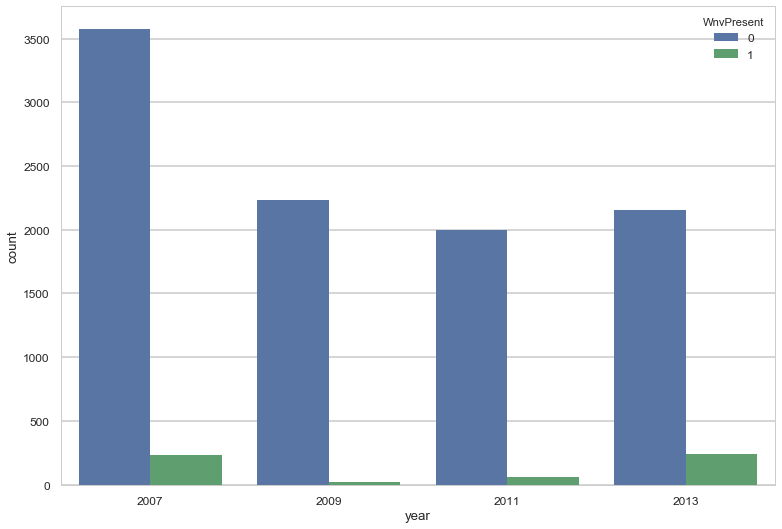

In [66]:
sns.countplot(train.year, hue=train.WnvPresent)

In [67]:
train['month'] = train.Date.dt.month

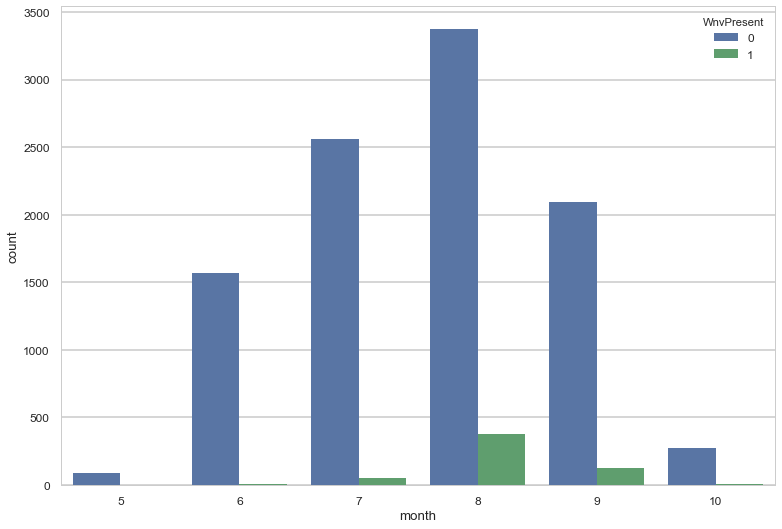

In [68]:
sns.countplot(train.month, hue=train.WnvPresent)

In [69]:
test = pd.read_csv('../assets/test.csv')

In [70]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [11]:
weather = pd.read_csv('../assets/weather.csv')

In [13]:
pd.options.display.max_columns = 30

In [14]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [32]:
weather.shape

(2944, 22)

In [33]:
weather.Date = pd.to_datetime(weather.Date)

In [34]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [35]:
weather.describe(include=['object', 'datetime'])

,Date,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
count,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944,2944
unique,1472,60,42,48,31,31,122,119,98,2,1,4,168,104,102,178
top,2014-08-27 00:00:00,73,M,63,0,0,-,-,,0,M,M,0.00,29.34,30.00,6.9
freq,2,138,1472,135,1870,1147,1472,1472,1609,1472,2944,1472,1577,128,96,63
first,2007-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2014-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
spray = pd.read_csv('../assets/spray.csv')

In [40]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [41]:
spray.shape

(14835, 4)